In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,NaN,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,NaN,7.0,NaN,3.0,2.0,1.0
2,3.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,1.0
3,6.0,8.0,NaN,NaN,3.0,4.0,3.0,7.0,1.0
4,NaN,1.0,1.0,3.0,2.0,NaN,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,NaN,1.0,1.0,NaN,2.0,1.0,2.0,1.0,1.0
679,2.0,NaN,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,NaN,5.0,6.0,NaN
681,1.0,NaN,1.0,3.0,2.0,NaN,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	99
float64		column 2	202
float64		column 3	99
float64		column 4	169
float64		column 5	132
float64		column 6	99
float64		column 7	70
float64		column 8	132
float64		column 9	202


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,584.000000,481.000000,584.000000,514.000000,551.000000,584.000000,613.000000,551.000000,481.000000
mean,4.429795,2.972973,3.140411,2.782101,3.170599,3.434932,3.440457,2.662432,1.598753
std,2.739434,2.884097,2.941536,2.766267,2.139653,3.549099,2.421674,2.893633,1.771040
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

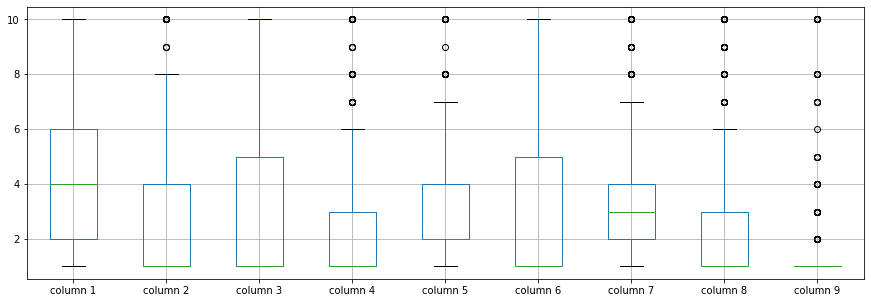

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.429795
column 2    2.972973
column 3    3.140411
column 4    2.782101
column 5    3.170599
column 6    3.434932
column 7    3.440457
column 8    2.662432
column 9    1.598753
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.587835,0.627410,0.495233,0.518540,0.559813,0.487983,0.511089,0.321309
column 2,0.587835,1.000000,0.879605,0.670621,0.755566,0.655375,0.732766,0.645133,0.510196
column 3,0.627410,0.879605,1.000000,0.670207,0.732400,0.677629,0.708521,0.697768,0.420608
column 4,0.495233,0.670621,0.670207,1.000000,0.602760,0.640066,0.641912,0.523815,0.382877
column 5,0.518540,0.755566,0.732400,0.602760,1.000000,0.571769,0.610534,0.599176,0.501206
column 6,0.559813,0.655375,0.677629,0.640066,0.571769,1.000000,0.638897,0.594636,0.284687
column 7,0.487983,0.732766,0.708521,0.641912,0.610534,0.638897,1.000000,0.623691,0.329547
column 8,0.511089,0.645133,0.697768,0.523815,0.599176,0.594636,0.623691,1.000000,0.411539
column 9,0.321309,0.510196,0.420608,0.382877,0.501206,0.284687,0.329547,0.411539,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+19,9+19+19,9+19+19,9+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19,9+19+19+19,9+19+19,9+19,9], vae_layer = False, seed = 190)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.07838335491362
Epoch: 1 , loss: 29.082313878195627
Epoch: 2 , loss: 28.980777104695637
Epoch: 3 , loss: 28.83357856387184
Epoch: 4 , loss: 28.614907083057222
Epoch: 5 , loss: 27.01816195533389
Epoch: 6 , loss: 25.59635711851574
Epoch: 7 , loss: 24.924284980410622
Epoch: 8 , loss: 24.38422089531308
Epoch: 9 , loss: 24.212665671393985
Epoch: 10 , loss: 23.576770691644576
Epoch: 11 , loss: 23.736211549668084
Epoch: 12 , loss: 23.701026734851656
Epoch: 13 , loss: 23.02329077039446
Epoch: 14 , loss: 23.314978009178525
Epoch: 15 , loss: 22.766666911897204
Epoch: 16 , loss: 22.865260669163295
Epoch: 17 , loss: 22.39755151385353
Epoch: 18 , loss: 22.7708934375218
Epoch: 19 , loss: 22.589953240894136
Epoch: 20 , loss: 22.24942904426938
Epoch: 21 , loss: 22.494453952426003
Epoch: 22 , loss: 22.662820066724503
Epoch: 23 , loss: 22.215803986503964
Epoch: 24 , loss: 22.16863641284761
Epoch: 25 , loss: 22.20541761

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,-0.600590,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,-3.063199,0.000000,-7.670821,0.000000,0.000000,0.000000
2,0.000000,0.000000,-0.601458,0.000000,-1.575208,0.000000,0.000000,-0.652805,0.000000
3,0.000000,0.000000,-4.782588,1.797512,0.000000,0.000000,0.000000,0.000000,0.000000
4,-2.750534,0.000000,0.000000,0.000000,0.000000,0.012288,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,-0.869098,0.000000,0.000000,0.450949,0.000000,0.000000,0.000000,0.000000,0.000000
679,0.000000,0.434801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
680,0.000000,0.000000,0.000000,0.000000,0.000000,-6.350594,0.000000,0.000000,-1.247561
681,0.000000,0.390265,0.000000,0.000000,0.000000,0.555704,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(125.78006978480825, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.3750954162045872

In [18]:
new_df.iloc[66,:]

column 1    1.634021
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    1.320159
column 6    1.000000
column 7    7.000000
column 8    2.000000
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.000000,1.000000,0.399410,2.000000,1.000000,3.000000,1.000000,1.000000
1,5.000000,4.000000,4.000000,1.936801,7.000000,2.329179,3.000000,2.000000,1.000000
2,3.000000,1.000000,0.398542,1.000000,0.424792,2.000000,3.000000,0.347195,1.000000
3,6.000000,8.000000,3.217412,2.797512,3.000000,4.000000,3.000000,7.000000,1.000000
4,1.249466,1.000000,1.000000,3.000000,2.000000,1.012288,3.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,2.130902,1.000000,1.000000,1.450949,2.000000,1.000000,2.000000,1.000000,1.000000
679,2.000000,1.434801,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
680,5.000000,10.000000,10.000000,10.000000,4.000000,3.649406,5.000000,6.000000,1.752439
681,1.000000,1.390265,1.000000,3.000000,2.000000,1.555704,1.000000,1.000000,1.000000


In [20]:
imputations[-1].to_excel("BCW_NE_20(imp).xlsx", index=False, header=False)